# Train model and score on annotations

### This notebook uses annotations to make a pandas dataframe to train and validate a model on.

In [2]:
%matplotlib notebook
import geopandas as gpd
import glob
import pandas as pd
from nso_ds_classes.nso_ds_normalize_scaler import scaler_class_all
from nso_ds_classes.nso_ds_annotations import extract_dataframe_pixels_values_from_tif_and_polygons
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import imblearn

# Prepare the dataset from the annotations

In [3]:
df = pd.DataFrame([])

# Read in all the annotations and put them in a dataframe.
for file in glob.glob("C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20*.gpkg"):
    file = file.replace("\\","/") 
    print(file)
    print(file.split(".")[0].split(" ")[-1])
    print( glob.glob("E:/data/coepelduynen/"+file.split(".")[0].split(" ")[-1]+"*height.tif")[0].replace("\\","/"))
    path_to_polygons = file
    path_to_tif = glob.glob("E:/data/coepelduynen/"+file.split(".")[0].split(" ")[-1]+"*height.tif")[0].replace("\\","/")
    print(path_to_polygons)
    print(path_to_tif)

    df =df.append(extract_dataframe_pixels_values_from_tif_and_polygons(path_to_tif, path_to_polygons))
    df.reset_index().drop(['index'],axis=1)

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20190601.gpkg
20190601
E:/data/coepelduynen/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20190601.gpkg
E:/data/coepelduynen/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: Shap

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20200625.gpkg
20200625
E:/data/coepelduynen/20200625_112015_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20200625.gpkg
E:/data/coepelduynen/20200625_112015_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: F

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20200731.gpkg
20200731
E:/data/coepelduynen/20200731_112003_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20200731.gpkg
E:/data/coepelduynen/20200731_112003_SV1-03_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: Shap

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20200915.gpkg
20200915
E:/data/coepelduynen/20200915_112329_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20200915.gpkg
E:/data/coepelduynen/20200915_112329_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: F

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20210709.gpkg
20210709
E:/data/coepelduynen/20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20210709.gpkg
E:/data/coepelduynen/20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: Shap

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20210815.gpkg
20210815
E:/data/coepelduynen/20210815_111051_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20210815.gpkg
E:/data/coepelduynen/20210815_111051_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: Shap

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20210907.gpkg
20210907
E:/data/coepelduynen/20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20210907.gpkg
E:/data/coepelduynen/20210907_112017_SV1-04_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: F

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20220515.gpkg
20220515
E:/data/coepelduynen/20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20220515.gpkg
E:/data/coepelduynen/20220515_113347_SV1-02_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: Shap

C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20220922.gpkg
20220922
E:/data/coepelduynen/20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_Voorhout_natura2000_coepelduynen_cropped_ndvi_height.tif
C:/repos/satellite-images-nso-datascience/annotations/Annotaties Coepelduynen 20220922.gpkg
E:/data/coepelduynen/20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_Voorhout_natura2000_coepelduynen_cropped_ndvi_height.tif
raster path opened
convert to RD


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for index, item in enumerate(shapes):
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_annotations.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_row)
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:447: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  all_bounds = [bounds(shape, transform=~dataset.transform) for shape in shapes]
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\rasterio\features.py:290: Shap

In [ ]:
df

,r,g,b,i,ndvi,height,label,image
0,589,612,476,1171,133,101,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
1,592,614,480,1153,132,1,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
2,591,614,479,1145,131,1,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
3,592,616,479,1146,131,81,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
4,598,624,488,1174,132,81,gras (schraal),20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...
...,...,...,...,...,...,...,...,...
46164,1174,883,893,836,83,0,vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...
46165,1172,881,892,833,83,0,vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...
46166,1159,866,873,801,81,0,vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...
46167,1152,858,857,778,80,0,vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...


In [ ]:
# Aggregate some categories and/or switch upper and lower case
df['label'] =df['label'].str.replace("zand","Zand")
df['label'] =df['label'].str.replace('gras(.*)','gras', regex=True)
df['label'] =df['label'].str.replace("struweel","Struweel")
df['label'] =df['label'].str.replace("Boom","Bos")
df['label'] =df['label'].str.replace("bos","Bos")
df['label'] =df['label'].str.replace("vochtig duinvallei","vochtige duinvallei")
df['label'] =df['label'].str.replace("schaduw","Schaduw")
df['label'] =df['label'].str.replace("laag gras","Laag gras")
df['label'] =df['label'].str.replace("asfalt","Asfalt")
df['label'] =df['label'].str.replace("wandelpad","Wandelpad")
df['label'] =df['label'].str.replace("Sachaduw","Schaduw")
df['label'] =df['label'].str.replace("mozaïek (.*)","gras",regex=True)
df['label'] =df['label'].str.replace("Gras (.*)","gras",regex=True)
df['label'] =df['label'].str.replace("gras","Gras",regex=True)
df['label'] =df['label'].str.replace("Wandelpad","Zand",regex=True)
df['label'] =df['label'].str.replace("vochtige duinvallei","Vochtige duinvallei")
df['label'] =df['label'].str.replace("Laag Gras","Gras")

In [ ]:
df['date'] = df['image'].str.split("_",1,expand=True)[0]

In [ ]:
df.to_csv("annotaties_coepelduynen_to_pixel.csv")

In [ ]:
df.groupby("label").mean()

,r,g,b,i,ndvi,height
label,,,,,,
Asfalt,574.574320,534.610019,435.908672,557.407565,99.233236,6.453937
Bos,389.458680,328.707875,220.604377,754.091828,128.120700,143.794263
Gras,474.577874,438.439385,325.833566,802.898605,125.808515,2.026694
Schaduw,561.248060,407.709260,320.109415,379.508795,82.992499,22.620538
Struweel,432.551458,370.873898,253.889227,759.000341,125.689568,61.502427
Vochtige duinvallei,477.053154,413.692736,313.372845,711.934420,121.766874,0.000000
Zand,751.471526,806.769977,756.045928,932.643788,111.722553,2.043245


In [ ]:
df.groupby("label").count()

,r,g,b,i,ndvi,height,image,date
label,,,,,,,,
Asfalt,22578,22578,22578,22578,22578,22578,22578,22578
Bos,117655,117655,117655,117655,117655,117655,117655,117655
Gras,703534,703534,703534,703534,703534,703534,703534,703534
Schaduw,3866,3866,3866,3866,3866,3866,3866,3866
Struweel,46970,46970,46970,46970,46970,46970,46970,46970
Vochtige duinvallei,54803,54803,54803,54803,54803,54803,54803,54803
Zand,139021,139021,139021,139021,139021,139021,139021,139021


In [ ]:
df.to_csv("annotaties_coepelduynen_to_pixel.csv")

In [ ]:
df = pd.read_csv("annotaties_coepelduynen_to_pixel.csv" ).drop(['Unnamed: 0'],axis=1)

In [ ]:
df['date'] = df['date'].astype(str)

### Scale the dataset here, make sure you have run run_make_scalers_normalize.ipynb to scale a .tif file

In [ ]:
df_scaled = df.copy()
# Scale dataframe
for date in df_scaled['date'].unique():
    print(date)

    ahn_type = ""

    if int(date[0:4]) <= 2019:
        ahn_type = "./scalers/ahn3.save"
    elif int(date[0:4]) > 2019:
        ahn_type = "./scalers/ahn4.save"

    a_normalize_scaler_class_all = scaler_class_all(scaler_file_band1 = glob.glob("./scalers/"+date.split(" ")[0]+"*band1*")[0].replace("\\","/"), \
                                                    scaler_file_band2 = glob.glob("./scalers/"+date.split(" ")[0]+"*band2*")[0].replace("\\","/"), \
                                                    scaler_file_band3 = glob.glob("./scalers/"+date.split(" ")[0]+"*band3*")[0].replace("\\","/"), \
                                                    scaler_file_band4 = glob.glob("./scalers/"+date.split(" ")[0]+"*band4*")[0].replace("\\","/"), \
                                                    scaler_file_band5 = glob.glob("./scalers/"+date.split(" ")[0]+"*band5*")[0].replace("\\","/"), \
                                                    scaler_file_band6 = ahn_type)
    
    df_scaled[df_scaled['date'] == date] = a_normalize_scaler_class_all.transform(df_scaled[df_scaled['date'] == date], col_names=["r","g","b","i",'ndvi','height'])

20190601


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20200625


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20200731


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20200915


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20210709


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20210815


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20210907


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20220515


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

20220922


c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
df_scaled.groupby("label").median()

,r,g,b,i,ndvi,height
label,,,,,,
Asfalt,0.387963,0.316498,0.253425,0.154792,0.649351,0.003922
Bos,0.281773,0.192460,0.145533,0.216645,0.851351,0.568627
Gras,0.284793,0.225923,0.203226,0.223260,0.812500,0.003922
Schaduw,0.317726,0.205312,0.159222,0.114754,0.581197,0.035294
Struweel,0.288462,0.201170,0.153023,0.216201,0.836601,0.247059
Vochtige duinvallei,0.292642,0.217822,0.179032,0.201321,0.811688,0.000000
Zand,0.493856,0.473545,0.461473,0.263504,0.729730,0.003922


In [ ]:
df_scaled = df_scaled.drop(df_scaled[(df_scaled['label'] == "Schaduw") & (df_scaled['height'] >= 0.1) ].index)

In [ ]:
df_scaled.to_csv("annotaties_coepelduynen_to_pixel_scaled.csv")

# Plot the data

In [2]:
df_scaled = pd.read_csv("annotaties_coepelduynen_to_pixel_scaled.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
df_scaled

,r,g,b,i,ndvi,height,label,image,date
0,0.316497,0.275428,0.255914,0.249149,0.852564,0.396078,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
1,0.318109,0.276328,0.258065,0.245319,0.846154,0.003922,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
2,0.317571,0.276328,0.257527,0.243617,0.839744,0.003922,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
3,0.318109,0.277228,0.257527,0.243830,0.839744,0.317647,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
4,0.321333,0.280828,0.262366,0.249787,0.846154,0.317647,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
...,...,...,...,...,...,...,...,...,...
1088422,0.503863,0.455155,0.383097,0.276638,0.709402,0.000000,Vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1088423,0.503004,0.454124,0.382668,0.275645,0.709402,0.000000,Vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1088424,0.497425,0.446392,0.374517,0.265056,0.692308,0.000000,Vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1088425,0.494421,0.442268,0.367653,0.257445,0.683761,0.000000,Vochtige duinvallei,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922


In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=3)
pca.fit(df_scaled[['r','g','b','i','height']])
df_pca = pd.DataFrame(pca.transform(df_scaled[['r','g','b','i','height']]))

<IPython.core.display.Javascript object>


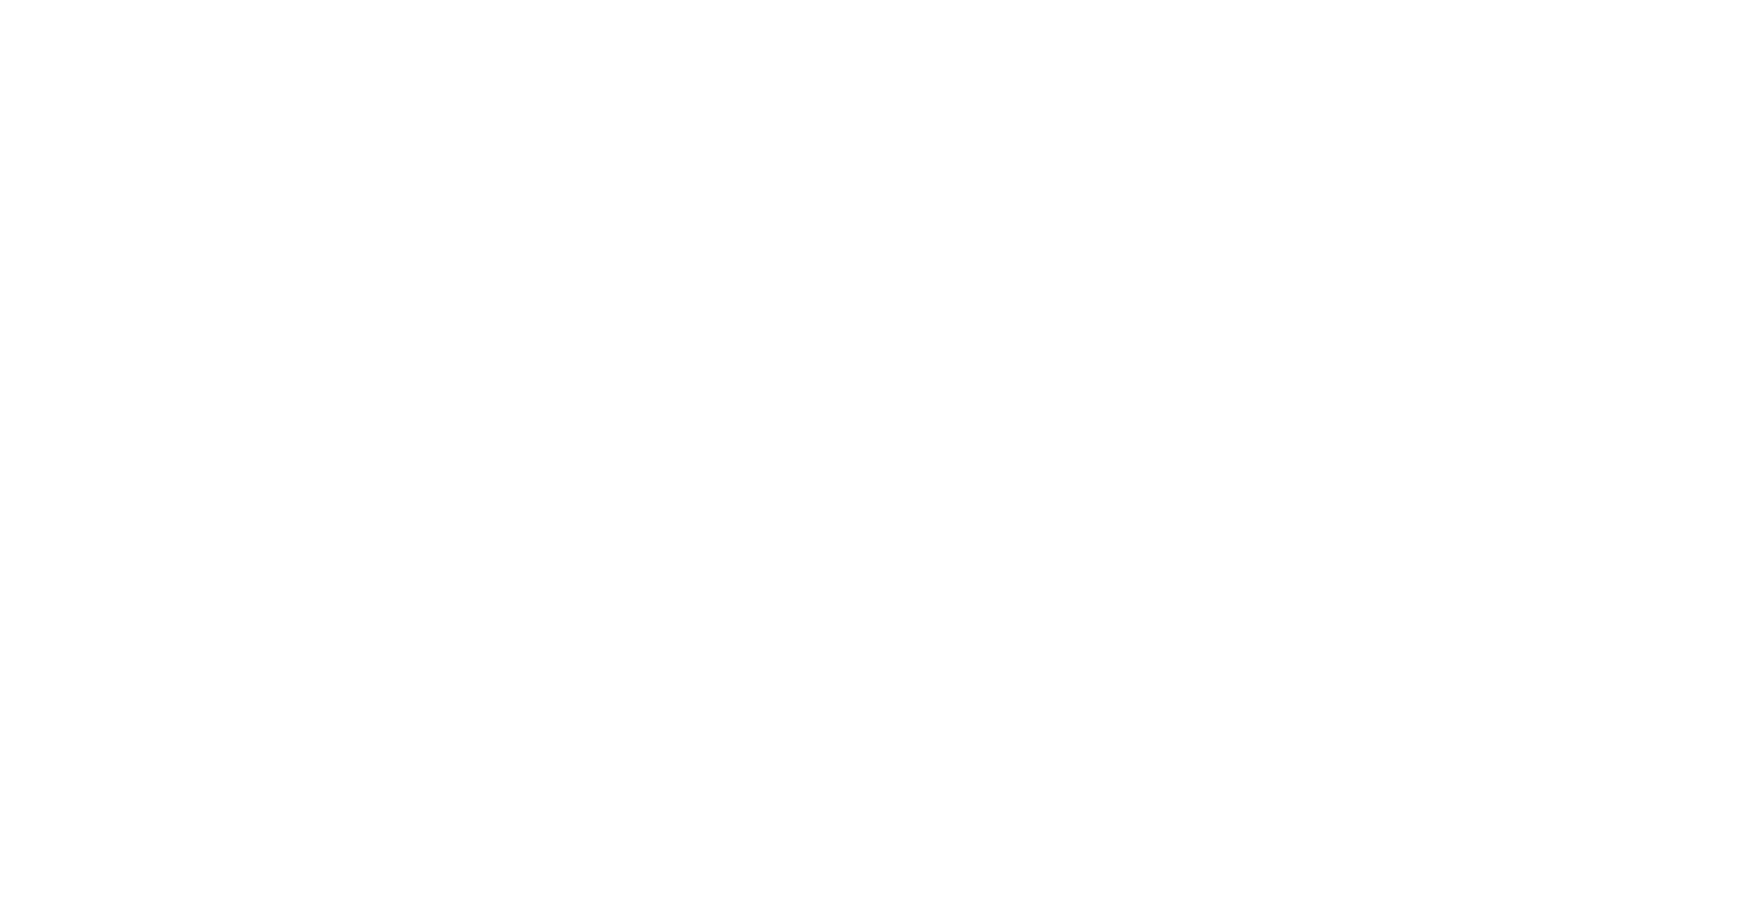

In [4]:
df_scaled_sample = df_scaled.reset_index().drop(['index'],axis=1)
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

for grp_name, grp_idx in df_scaled_sample.groupby('label').groups.items():
    y = df_scaled_sample.iloc[grp_idx,2]
    x = df_scaled_sample.iloc[grp_idx,4]
    z = df_scaled_sample.iloc[grp_idx,5]
    ax.scatter(x,y,z, label=grp_name)  # this way you can control color/marker/size of each group freely
    # if you want to do everything in one line, lol

ax.legend()

<IPython.core.display.Javascript object>


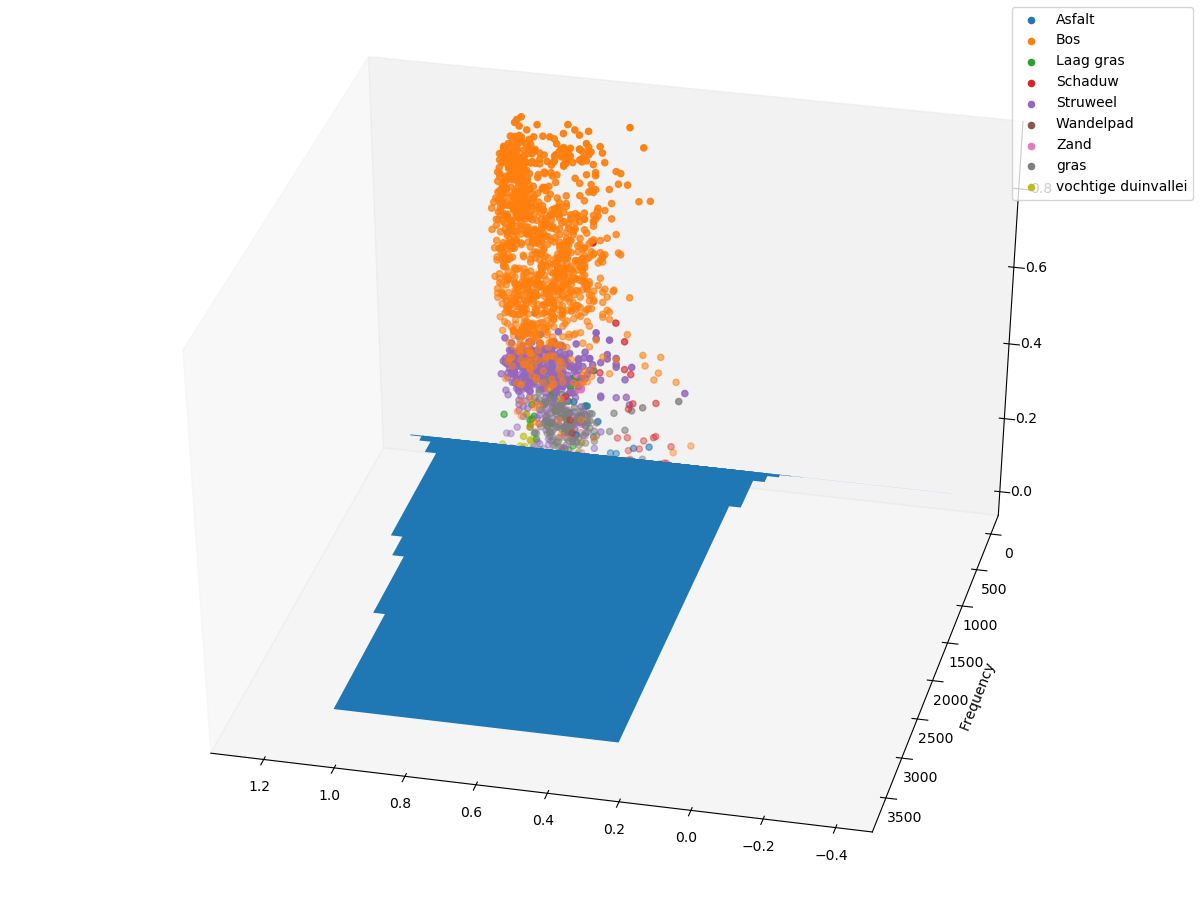

In [15]:
%matplotlib notebook
from IPython.display import HTML
from matplotlib import animation
df_scaled_sample = df_scaled.sample(10000).reset_index().drop(['index'],axis=1)
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

for grp_name, grp_idx in df_scaled_sample.groupby('label').groups.items():
    y = df_scaled_sample.iloc[grp_idx,2]
    x = df_scaled_sample.iloc[grp_idx,4]
    z = df_scaled_sample.iloc[grp_idx,5]
    ax.scatter(x,y,z, label=grp_name)  # this way you can control color/marker/size of each group freely
    # if you want to do everything in one line, lol

ax.legend()

In [73]:
df_scaled[df_scaled['label'] == 'Asfalt']['ndvi'].plot.hist(bins=25)

<IPython.core.display.Javascript object>

In [14]:
df_scaled[df_scaled['label'] == 'Zand']['ndvi'].plot.hist(bins=25)

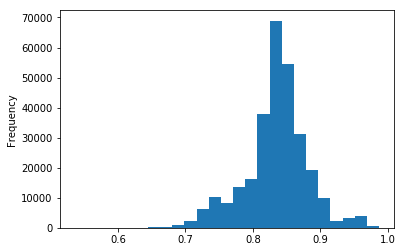

In [58]:
df_scaled[df_scaled['label'] == 'Laag gras']['ndvi'].plot.hist(bins=25)

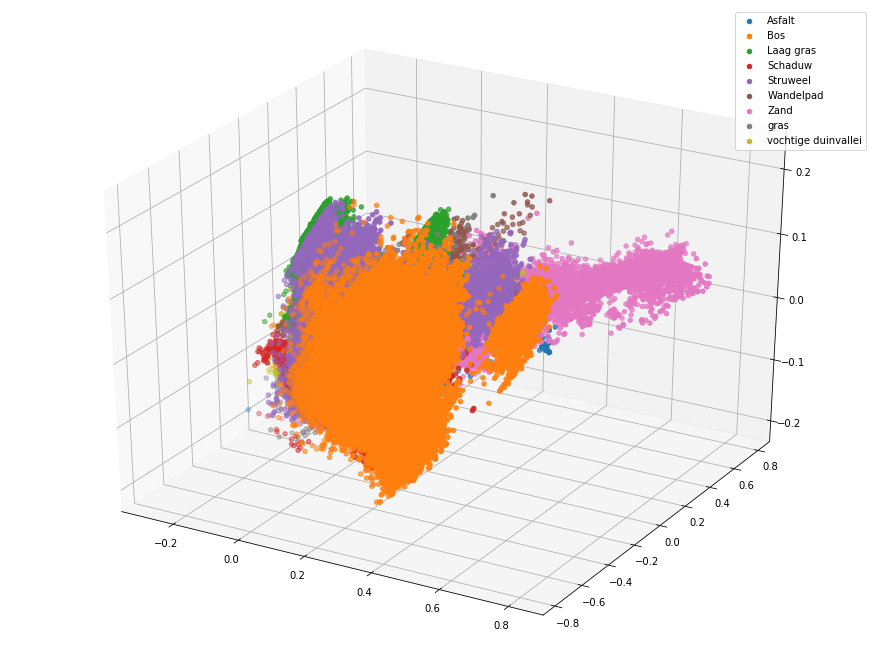

In [42]:
df_scaled_sample = df_scaled.reset_index().drop(['index'],axis=1)
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

for grp_name, grp_idx in df_scaled_sample.groupby('label').groups.items():
    y = df_pca.iloc[grp_idx,0]
    x = df_pca.iloc[grp_idx,1]
    z = df_pca.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=grp_name)  # this way you can control color/marker/size of each group freely
    # if you want to do everything in one line, lol

ax.legend()

# Make a model

In [52]:
linearity = np.corrcoef(df_scaled[['r','g','b','i','ndvi','height']].sample(10000).values)

In [58]:
df_scaled[['r','g','b','i','ndvi','height']].corr()

,r,g,b,i,ndvi,height
r,1.000000,0.977236,0.921777,0.547984,-0.485992,-0.175945
g,0.977236,1.000000,0.964363,0.604021,-0.444023,-0.239525
b,0.921777,0.964363,1.000000,0.522599,-0.496534,-0.269552
i,0.547984,0.604021,0.522599,1.000000,0.358250,-0.073041
ndvi,-0.485992,-0.444023,-0.496534,0.358250,1.000000,0.174285
height,-0.175945,-0.239525,-0.269552,-0.073041,0.174285,1.000000


In [40]:
df_scaled['date'].unique()

array([20190601, 20200625, 20200731, 20200915, 20210709, 20210815,
       20210907, 20220515, 20220922], dtype=int64)

In [59]:
# Use a date to make a test set.
df_scaled_training = df_scaled[df_scaled['date'] != 20200915]
df_scaled_test = df_scaled[df_scaled['date'] == 20200915]

In [33]:
# Rebalance dataset.
oversample = imblearn.over_sampling.SMOTE()
X_new, y_new = oversample.fit_resample(df_scaled_training[['r','g','b','i','ndvi','height']], df_scaled_training['label'])

In [34]:
X_new['label'] = y_new

In [35]:
df_scaled_balanced = X_new

In [36]:
df_scaled_balanced['label'].value_counts()

Gras                   647521
Zand                   647521
Struweel               647521
Bos                    647521
Asfalt                 647521
Schaduw                647521
Vochtige duinvallei    647521
Name: label, dtype: int64

In [27]:
#X_train, X_test, y_train, y_test = train_test_split(df_scaled_balanced[['r','g','b','i','ndvi','height']].values, df_scaled_balanced['label'].values,test_size=0.3)

In [9]:
df_scaled_balanced

,r,g,b,i,ndvi,height,label
0,0.316497,0.275428,0.255914,0.249149,0.852564,0.396078,Gras
1,0.318109,0.276328,0.258065,0.245319,0.846154,0.003922,Gras
2,0.317571,0.276328,0.257527,0.243617,0.839744,0.003922,Gras
3,0.318109,0.277228,0.257527,0.243830,0.839744,0.317647,Gras
4,0.321333,0.280828,0.262366,0.249787,0.846154,0.317647,Gras
...,...,...,...,...,...,...,...
4924733,0.464125,0.486355,0.491306,0.261361,0.732484,0.003922,Zand
4924734,0.515974,0.465539,0.484870,0.276664,0.764706,0.003922,Zand
4924735,0.471042,0.496236,0.499967,0.266328,0.732484,0.003922,Zand
4924736,0.376183,0.359542,0.328911,0.170077,0.662420,0.006393,Zand


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df_scaled_balanced[['r','g','b','i','ndvi','height']].values, df_scaled_balanced['label'].values,test_size=0.3)

In [87]:
# Gridsearch parameters, this section can be skipped the optimal parameters are below


# Number of trees in random forest
n_estimators = [10,20,100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,None]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True,False]
criterion = ['gini','entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

In [37]:
# Final parameters, final parameters which the best implementation performance vs model 
model = RandomForestClassifier(n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', bootstrap=True)

In [60]:
model.fit(df_scaled_balanced[['b','i','ndvi','height']].values, df_scaled_balanced['label'].values)

RandomForestClassifier(min_samples_split=5, n_estimators=10)

In [61]:
print(metrics.classification_report(df_scaled_balanced['label'].values, model.predict(df_scaled_balanced[['b','i','ndvi','height']].values)))

                     precision    recall  f1-score   support

             Asfalt       1.00      1.00      1.00    647521
                Bos       1.00      1.00      1.00    647521
               Gras       1.00      1.00      1.00    647521
            Schaduw       1.00      1.00      1.00    647521
           Struweel       1.00      1.00      1.00    647521
Vochtige duinvallei       1.00      1.00      1.00    647521
               Zand       1.00      1.00      1.00    647521

           accuracy                           1.00   4532647
          macro avg       1.00      1.00      1.00   4532647
       weighted avg       1.00      1.00      1.00   4532647



In [62]:
# On the unknown image
print(metrics.classification_report(df_scaled_test['label'].values,model.predict(df_scaled_test[['b','i','ndvi','height']].values))) 

                     precision    recall  f1-score   support

             Asfalt       0.49      0.79      0.61      4131
                Bos       0.81      0.92      0.86     38728
               Gras       0.98      0.86      0.91     56013
            Schaduw       0.14      0.08      0.10      1218
           Struweel       0.66      0.65      0.65     19231
Vochtige duinvallei       1.00      1.00      1.00      5328
               Zand       0.98      0.97      0.97     11786

           accuracy                           0.85    136435
          macro avg       0.72      0.75      0.73    136435
       weighted avg       0.86      0.85      0.86    136435



In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['r','g','b','i','ndvi','height']].values, df_scaled['label'].values,test_size=0.3)

In [34]:
# Small width random forest
print(metrics.classification_report(y_test,model.predict(X_test)))

                     precision    recall  f1-score   support

             Asfalt       0.99      1.00      0.99      6635
                Bos       1.00      1.00      1.00     35156
               Gras       1.00      1.00      1.00    209971
            Schaduw       0.99      1.00      1.00       792
           Struweel       0.98      1.00      0.99     14132
Vochtige duinvallei       1.00      1.00      1.00     16430
               Zand       1.00      1.00      1.00     41205

           accuracy                           1.00    324321
          macro avg       0.99      1.00      1.00    324321
       weighted avg       1.00      1.00      1.00    324321



In [ ]:
print(metrics.classification_report(y_test,rf_random.predict(X_test)))

In [35]:
model.predict([df_scaled[['r','g','b','i','ndvi','height']].values[0]])

array(['Gras'], dtype=object)

In [33]:
print(metrics.classification_report(y_test,model.predict(X_test)))

                     precision    recall  f1-score   support

             Asfalt       0.97      0.93      0.95      3263
                Bos       0.99      0.98      0.98     33580
               Gras       0.99      0.99      0.99     99654
          Laag Gras       0.99      0.99      0.99     87005
            Schaduw       0.98      0.96      0.97       906
           Struweel       0.93      0.95      0.94     11268
               Zand       0.99      0.99      0.99     33614
vochtige duinvallei       0.99      0.98      0.98     29736

           accuracy                           0.99    299026
          macro avg       0.98      0.97      0.98    299026
       weighted avg       0.99      0.99      0.99    299026



In [36]:
len(model.predict(df_scaled[['r','g','b','i','ndvi','height']]))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


996753

In [37]:
confusion_matrix = metrics.confusion_matrix(model.predict(X_test), y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)

cm_display.plot()
plt.savefig('confusion_matrix.pdf')

<IPython.core.display.Javascript object>

In [19]:
#model = RandomForestClassifier(criterion="entropy", max_features=3)
print(cross_val_score(model,df_scaled[['r','g','b','i','ndvi','height']].values,df_scaled['label'].values, cv=4))
#model = model.fit(X_train,y_train)

c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

[0.68343912 0.9536825  0.83569978 0.6163491 ]


In [38]:
filename = './models/randomforest_classifier_coepelduynen_contrast_annotations_2019_2022.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = './models/randomforest_classifier_coepelduynen_contrast_annotations_grid_search_2019_2022.sav'
pickle.dump(rf_random, open(filename, 'wb'))

In [38]:
# Train the model on the whole dataset and export the model.
model = RandomForestClassifier(n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features='auto', bootstrap=False)
model = model.fit(df_scaled_balanced[['r','g','b','i','ndvi','height']].values, df_scaled_balanced['label'].values)

filename = './models/randomforest_classifier_coepelduynen_contrast_annotations_grid_search_all_data_2019_2022_small_balanced_v1.3.sav'
pickle.dump(model, open(filename, 'wb'))

c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
# Train the model on the whole dataset and export the model.
model = RandomForestClassifier(n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', bootstrap=False)
model = model.fit(df_scaled[['r','g','b','i','ndvi','height']].values, df_scaled['label'].values)

filename = './models/randomforest_classifier_coepelduynen_contrast_annotations_grid_search_all_data_2019_2022.sav'
pickle.dump(model, open(filename, 'wb'))

# Deep Learning model

In [62]:
import tensorflow as tf

import tensorflow_datasets as tfds
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [56]:
df_scaled['label_num'] = label_encoder.fit_transform(df_scaled['label'])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['r','g','b','i','ndvi','height']].values, df_scaled['label_num'].values,test_size=0.3)

In [40]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [41]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<IPython.core.display.Javascript object>

In [59]:
df_scaled[['r','g','b','i','height']].values.shape

(1046864, 5)

In [103]:
model = models.Sequential()
model.add(layers.Conv2D(6, (1, 1), activation='relu', input_shape=(1,1,6)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(12, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(12, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(10))

In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [95]:
X_train = X_train.reshape(732804,1,1,6)

In [101]:
len(y_train)

732804

In [116]:


history = model.fit(X_train.reshape(732804,1,1,6), y_train, epochs=10, 
                    validation_data=(X_test.reshape(314060,1,1,6), y_test))

Epoch 1/10
22901/22901 [==============================] - 42s 2ms/step - loss: 0.1665 - accuracy: 0.9436 - val_loss: 0.1694 - val_accuracy: 0.9406
Epoch 2/10
22901/22901 [==============================] - 41s 2ms/step - loss: 0.1633 - accuracy: 0.9444 - val_loss: 0.1574 - val_accuracy: 0.9463
Epoch 3/10
22901/22901 [==============================] - 41s 2ms/step - loss: 0.1595 - accuracy: 0.9456 - val_loss: 0.1583 - val_accuracy: 0.9459
Epoch 4/10
22901/22901 [==============================] - 41s 2ms/step - loss: 0.1555 - accuracy: 0.9473 - val_loss: 0.1601 - val_accuracy: 0.9460
Epoch 5/10
22901/22901 [==============================] - 41s 2ms/step - loss: 0.1517 - accuracy: 0.9483 - val_loss: 0.1465 - val_accuracy: 0.9509
Epoch 6/10
22901/22901 [==============================] - 41s 2ms/step - loss: 0.1490 - accuracy: 0.9492 - val_loss: 0.1451 - val_accuracy: 0.9493
Epoch 7/10
22901/22901 [==============================] - 41s 2ms/step - loss: 0.1468 - accuracy: 0.9498 - val_loss: 0

In [119]:
len(X_train)

732804

In [139]:
predictions =[ np.argmax(prediction) for prediction in model.predict(X_test.reshape(X_test.shape[0],1,1,6))]

In [140]:
metrics.classification_report(label_encoder.inverse_transform(y_test),label_encoder.inverse_transform(predictions))

'                     precision    recall  f1-score   support\n\n             Asfalt       0.79      0.71      0.75      5565\n                Bos       0.98      0.93      0.95     33581\n               Gras       0.97      0.98      0.97    100366\n          Laag Gras       0.96      0.96      0.96     93872\n            Schaduw       0.80      0.66      0.72       843\n           Struweel       0.77      0.85      0.81     11881\n               Zand       0.98      0.98      0.98     38126\nvochtige duinvallei       0.95      0.93      0.94     29826\n\n           accuracy                           0.95    314060\n          macro avg       0.90      0.88      0.89    314060\n       weighted avg       0.95      0.95      0.95    314060\n'

In [135]:
label_encoder.inverse_transform(predictions)

array(['Laag Gras', 'Bos', 'Gras', ..., 'Bos', 'Gras', 'Gras'],
      dtype=object)

In [127]:
y_train[0]

3

In [113]:
X_test.reshape(314060,1,1,6)

array([[[[0.26813541, 0.21287129, 0.18225806, 0.20553191, 0.83974359,
          0.        ]]],


       [[[0.30736163, 0.26147615, 0.24569892, 0.23085106, 0.83333333,
          0.00392157]]],


       [[[0.25083389, 0.21165049, 0.15898464, 0.24323454, 0.8525641 ,
          0.        ]]],


       ...,


       [[[0.22881921, 0.17993528, 0.13360053, 0.19909794, 0.82051282,
          0.00392157]]],


       [[[0.23882588, 0.18899676, 0.14696059, 0.20908505, 0.82051282,
          0.00392157]]],


       [[[0.4516129 , 0.39464068, 0.3573017 , 0.23494724, 0.7       ,
          0.00392157]]]])

In [115]:
model.test_on_batch(X_test.reshape(314060,1,1,6),y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[0.16105984151363373, 0.945013701915741]

In [27]:
df_scaled

,r,g,b,i,ndvi,height,label,image,date
0,0.316497,0.275428,0.255914,0.249149,0.852564,0.396078,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
1,0.318109,0.276328,0.258065,0.245319,0.846154,0.003922,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
2,0.317571,0.276328,0.257527,0.243617,0.839744,0.003922,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
3,0.318109,0.277228,0.257527,0.243830,0.839744,0.317647,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
4,0.321333,0.280828,0.262366,0.249787,0.846154,0.317647,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
...,...,...,...,...,...,...,...,...,...
1047980,0.720601,0.726804,0.682969,0.375248,0.683761,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1047981,0.730901,0.738144,0.696268,0.390470,0.692308,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1047982,0.736910,0.743814,0.702703,0.399404,0.700855,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1047983,0.724034,0.726804,0.682969,0.382859,0.692308,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922


In [ ]:
model = tf.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))

# Check contrast model.

In [32]:
from nso_ds_classes.nso_ds_models import cluster_scaler_BNDVIH_model
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
confusion_matrix = metrics.confusion_matrix(df_scaled[df_scaled['label'] != "Pad"]['label'].values, df_scaled[df_scaled['label'] != "Pad"]['predict'].values)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=df_scaled[df_scaled['label'] != "Pad"]['predict'].unique())

cm_display.plot()
plt.show()

In [34]:
cluster_centers_file = "./cluster_centers/normalized_5_BHNDVI_cluster_centers_dunes.csv"

In [35]:
a_cluster_annotations_stats_model = cluster_scaler_BNDVIH_model(cluster_centers_file)

In [36]:
a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([df[['r','g','b','i','ndvi','height']].values[0]]))

'Bos'

In [27]:
df_scaled

,r,g,b,i,ndvi,height,label,image,date
0,0.316497,0.275428,0.255914,0.249149,0.852564,0.396078,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
1,0.318109,0.276328,0.258065,0.245319,0.846154,0.003922,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
2,0.317571,0.276328,0.257527,0.243617,0.839744,0.003922,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
3,0.318109,0.277228,0.257527,0.243830,0.839744,0.317647,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
4,0.321333,0.280828,0.262366,0.249787,0.846154,0.317647,Gras,20190601_105844_SV1-04_50cm_RD_11bit_RGBI_Katw...,20190601
...,...,...,...,...,...,...,...,...,...
1047980,0.720601,0.726804,0.682969,0.375248,0.683761,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1047981,0.730901,0.738144,0.696268,0.390470,0.692308,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1047982,0.736910,0.743814,0.702703,0.399404,0.700855,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922
1047983,0.724034,0.726804,0.682969,0.382859,0.692308,0.003922,Zand,20220922_110546_SV2-01_SV_RD_11bit_RGBI_50cm_V...,20220922


In [37]:
df_scaled['predict'] = df_scaled.apply(lambda x: a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([x[['r','g','b','i','ndvi','height']]])), axis=1)

In [38]:
df_scaled['predict'].unique()

array(['Bos', 'Gras', 'Struweel', 'Laag gras', 'Asfalt', 'Zand'],
      dtype=object)

In [39]:
print(metrics.classification_report(df_scaled['label'], df_scaled['predict']))

c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\

                     precision    recall  f1-score   support

             Asfalt       0.35      0.70      0.47     18263
                Bos       1.00      0.81      0.90    111919
               Gras       0.82      0.90      0.86    335515
          Laag Gras       0.00      0.00      0.00    312840
          Laag gras       0.00      0.00      0.00         0
            Schaduw       0.00      0.00      0.00      3866
           Struweel       0.56      0.87      0.68     39586
               Zand       0.84      0.96      0.89    126996
vochtige duinvallei       0.00      0.00      0.00     99000

           accuracy                           0.54   1047985
          macro avg       0.40      0.47      0.42   1047985
       weighted avg       0.50      0.54      0.51   1047985



c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
